# Long Short Term Memory (LSTM) 
# For Trading Socks

* Scraping Stock prices from Yahoo-Finance  
* Model: LSTM for predicting the stock price 'trend'. 
* Strategy: Enter to the long position if LSTM is predicting up-trend and and RSI is less than 40 or enter to the short position if LSTM is predicting down-trend and RSI is more than 60          
* Trading based on the trend based on the model is promissing!

# 1. Importing Data

### Importing the libraries

In [1]:
Symbol ='OPTT'#'AEF'#'ADT'#'TSLA'#'ACER'#'ACB'#'ABEV'#'GOOGL'#'ACIU'##'SELB'##  'ABEV' #'AAPL' #'GOOGL' #'AAU'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the stock price data

In [9]:
import yfinance as yf

#define the ticker symbol


#get data on this ticker
tickerData = yf.Ticker(Symbol)

#get the historical prices for this ticker
data = tickerData.history( start='2015-1-1', end='2021-4-6')

#see your data
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,124.00,136.00,122.00,130.00,2109,0,0.0
2015-01-05,128.00,138.00,122.00,130.00,1854,0,0.0
2015-01-06,138.00,138.00,120.00,122.00,1692,0,0.0
2015-01-07,124.00,128.00,116.00,120.00,873,0,0.0
2015-01-08,120.00,120.00,114.00,118.00,1206,0,0.0
...,...,...,...,...,...,...,...
2021-03-29,2.91,2.96,2.66,2.72,2719700,0,0.0
2021-03-30,2.70,3.05,2.67,3.00,3684500,0,0.0
2021-03-31,3.26,3.44,3.11,3.31,4869100,0,0.0


# 2. Overview of data

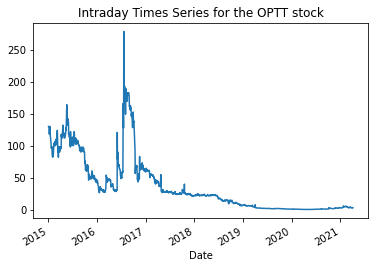

In [10]:
data['Close'].plot()
plt.title('Intraday Times Series for the '+f'{Symbol}'+' stock')
plt.show()

In [11]:
len(data.iloc[:,0:1].values)

1574

In [12]:
Keep_Days=100
training_set=data.iloc[:-Keep_Days,0:1].values
len(training_set)

1474

In [13]:
data.iloc[-100,:]

Open                  1.80
High                  1.84
Low                   1.65
Close                 1.68
Volume          4068900.00
Dividends             0.00
Stock Splits          0.00
Name: 2020-11-09 00:00:00, dtype: float64

# 3. Feature engineering

### Feature Scaling

In [14]:
training_set;

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [18]:
n=60

In [19]:
X_train = []
y_train = []
for i in range(n, len(training_set)):
    X_train.append(training_set_scaled[i-n:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [20]:
X_train.shape

(1414, 60)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
X_train.shape

(1414, 60, 1)

# 4. Model building

## Building and Training the LSTM

### Importing the Keras libraries and packages

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the LSTM

In [27]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [31]:
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.2))

### Adding the output layer

In [32]:
regressor.add(Dense(units = 1))

# 5. Compiling the LSTM

In [33]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the LSTM to the Training set

In [34]:
regressor.fit(X_train, y_train, epochs = 30, batch_size = 64)

Epoch 1/30
23/23 [==============================] - 7s 83ms/step - loss: 0.0183
Epoch 2/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0059
Epoch 3/30
23/23 [==============================] - 2s 87ms/step - loss: 0.0048
Epoch 4/30
23/23 [==============================] - 2s 85ms/step - loss: 0.0049
Epoch 5/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0045
Epoch 6/30
23/23 [==============================] - 2s 96ms/step - loss: 0.0036
Epoch 7/30
23/23 [==============================] - 2s 92ms/step - loss: 0.0036:
Epoch 8/30
23/23 [==============================] - 2s 92ms/step - loss: 0.0028
Epoch 9/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0038
Epoch 10/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0042
Epoch 11/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0032
Epoch 12/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0033
Epoch 13/30
23/23 [=================

# 6. Making the predictions

In [35]:
real_stock_price = data.iloc[-Keep_Days:, 0:1].values

In [36]:
len(real_stock_price)

100

### Getting the predicted stock price

In [37]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = data.iloc[len(data)- len(real_stock_price) -n:,0:1].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n, n+len(real_stock_price)):
    X_test.append(inputs[i-n:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [38]:
len(predicted_stock_price)

100

In [39]:
def f(l):
    l=np.array(l)
    l=l.reshape(-1,1)
    l=sc.transform(l)
    y= regressor.predict(np.array([l]))
    y=sc.inverse_transform(y)
    return y[0][0]

In [40]:
X_test.shape

(100, 60, 1)

# 7. Visualising the results

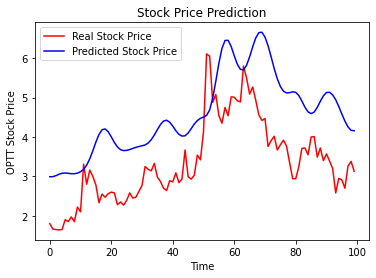

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(Symbol+' Stock Price')
plt.legend()
plt.show()

# 8. Backtesing

In [42]:
pip install backtrader

Note: you may need to restart the kernel to use updated packages.


In [43]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

In [44]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=60)

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        #############################################self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            
            X1=[self.dataclose[i] for i in range(-n,0)]
            X2=[self.dataclose[i] for i in range(-n+1,1)]
            # Not yet ... we MIGHT BUY if ...
            if f(X1) < f(X2) and self.rsi<40:
                    # current close less than previous close

                    #if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                self.log('LONG CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
            
            elif  f(X2) < f(X1) and 60<self.rsi:
                self.log('SHORT CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

        else:
            
            X1=[self.dataclose[i] for i in range(-n,0)]
            X2=[self.dataclose[i] for i in range(-n+1,1)]
            # Already in the market ... we might sell
            if (self.position.size)>0 and f(X2) < f(X1) :
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('CLOSE CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.close()
            elif  (self.position.size)<0 and f(X1) < f(X2):
                self.log('CLOSE CREATE, %.2f' % self.dataclose[0])
                self.order = self.close()

In [45]:
cerebro = bt.Cerebro()

In [46]:
cerebro.addstrategy(TestStrategy)

0

In [47]:
data_backtest = bt.feeds.YahooFinanceData(dataname = Symbol, fromdate = datetime.datetime(2020,10,2), todate = datetime.datetime(2021, 2, 26),reverse=False)

In [48]:
cerebro.adddata(data_backtest)

In [49]:
# Set our desired cash start
cerebro.broker.setcash(200000.0)

In [50]:
cerebro.addsizer(bt.sizers.PercentSizer, percents = 50)

In [51]:
# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)

In [52]:
# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 200000.00
2021-02-01, SHORT CREATE, 4.39
2021-02-02, SELL EXECUTED, Price: 4.75, Cost: -108200.46, Comm 108.20
2021-02-09, CLOSE CREATE, 5.51
2021-02-10, BUY EXECUTED, Price: 5.80, Cost: -108200.46, Comm 132.12
2021-02-10, OPERATION PROFIT, GROSS -23918.00, NET -24158.31
Final Portfolio Value: 175841.69


In [53]:
 pip install matplotlib==3.2.2

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hadi\\.conda\\envs\\tensor\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [56]:
cerebro.plot()

ImportError: cannot import name 'warnings' from 'matplotlib.dates' (C:\Users\Hadi\.conda\envs\Tensor\lib\site-packages\matplotlib\dates.py)

# 9. Summery 

* Scraping Stock prices from Yahoo-Finance  
* Model: LSTM for predicting the stock price 'trend'. 
* Strategy: Enter to the long position if LSTM is predicting up-trend and and RSI is less than 40 or enter to the short position if LSTM is predicting down-trend and RSI is more than 60          
* Trading based on the trend based on the model is promissing!  
(Trading with 50% of $200k demonstrated from 10/2/2020 to 2/26/2021 for an arbitrary stock)